# Data Ingestion

We load the additional libraries needed in this notebook:
* `seaborn`
* `matplotlib.pyplot`
* `sklearn`

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


We will be only using the data for **Perth** location and  so we filter the dataset accordingly:

In [3]:
all_df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

# Limit the dataset to Perth records
df = all_df[all_df["Location"] == "Perth"]
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
120638,2008-07-01,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,...,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
120639,2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
120640,2008-07-03,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,...,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
120641,2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
120642,2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes
120643,2008-07-06,Perth,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,Yes,No
120644,2008-07-07,Perth,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,No,No
120645,2008-07-08,Perth,3.2,20.4,0.0,1.4,6.9,NNW,24.0,NE,...,58.0,42.0,1023.9,1021.1,6.0,5.0,10.2,19.3,No,Yes
120646,2008-07-09,Perth,9.8,19.5,8.0,1.2,2.5,ESE,31.0,NaN,...,97.0,64.0,1026.4,1024.9,7.0,6.0,12.1,18.7,Yes,Yes
120647,2008-07-10,Perth,11.2,20.4,4.6,2.8,1.7,NNW,46.0,NE,...,79.0,50.0,1020.2,1014.0,7.0,7.0,13.4,19.0,Yes,Yes


# Exploratory Data Analysis

Let's see how many records and columns there are in the dataset.

In [4]:
print(f"Number of records: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of records: 3193
Number of columns: 23


What are the columns and their properties?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 120638 to 123830
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3193 non-null   object 
 1   Location       3193 non-null   object 
 2   MinTemp        3193 non-null   float64
 3   MaxTemp        3192 non-null   float64
 4   Rainfall       3193 non-null   float64
 5   Evaporation    3192 non-null   float64
 6   Sunshine       3188 non-null   float64
 7   WindGustDir    3188 non-null   object 
 8   WindGustSpeed  3188 non-null   float64
 9   WindDir9am     3059 non-null   object 
 10  WindDir3pm     3186 non-null   object 
 11  WindSpeed9am   3193 non-null   float64
 12  WindSpeed3pm   3192 non-null   float64
 13  Humidity9am    3184 non-null   float64
 14  Humidity3pm    3185 non-null   float64
 15  Pressure9am    3192 non-null   float64
 16  Pressure3pm    3192 non-null   float64
 17  Cloud9am       3191 non-null   float64
 18  C

The dataset has $23$ columns including the target variable (*RainTomorrow*):
* It consists of both numerical (`float64`) and categorical (`object`) features.
* Most of the columns have null values which requires addressing later 

## Target Variable: RainTomorrow

Let's have a sneak peek ofthe target variable, *RainTomorrow*.

In [6]:
target = df['RainTomorrow']
target.head(15)

120638     No
120639     No
120640    Yes
120641    Yes
120642    Yes
120643     No
120644     No
120645    Yes
120646    Yes
120647    Yes
120648    Yes
120649     No
120650     No
120651     No
120652    Yes
Name: RainTomorrow, dtype: object

The target, *RainTomorrow*, is a categorical variable of either **Yes** or **No**.

Let's count the values for each prediction.

In [7]:
target_count = target.value_counts()

yes_percent = float(target_count['Yes'])/len(target) * 100
no_percent = float(target_count['No'])/len(target) * 100

print('Target (RainTomorrow) Values Count')
print(f" * Yes:\t{target_count['Yes']:5} ({yes_percent:.1f}%)")
print(f" * No:\t{target_count['No']:5} ({(no_percent):.1f}%)")

Target (RainTomorrow) Values Count
 * Yes:	  645 (20.2%)
 * No:	 2548 (79.8%)


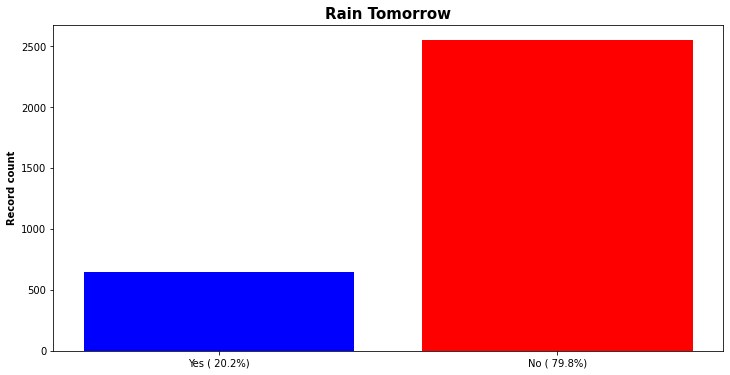

In [8]:
plt.figure(figsize=(12,6))
plt.title("Rain Tomorrow", fontweight="bold", fontsize=15)
plt.bar(f"Yes ({yes_percent: .1f}%)", target_count['Yes'], color="blue")
plt.bar(f"No ({no_percent: .1f}%)", target_count['No'], color="red")
plt.ylabel("Record count", fontweight="bold")
plt.show()

📗 The dataset is highly imbalanced with the **No** prediction being $4$x more thant the **Yes** prediction.